# IDNYC Data Analysis Project

For this project we will be exploring the IDNYC dataset provided by NYC Open Data.

### Pipeline

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/IDNYC_Applications_and_Cards_Issued_20240731.csv')

In [ ]:
df = data.copy()
df = df.rename(columns = { 'IDNYC Applications':'apps' , 'IDNYC Cards Issued':'cards_issued'})
df.index = pd.to_datetime(df['Month'], format = '%B %Y')
df = df.drop('Month', axis = 1)

# Exploratory Data Analysis

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/IDNYC_Applications_and_Cards_Issued_20240731.csv')

In [ ]:
data.head()

,Month,IDNYC Applications,IDNYC Cards Issued
0,January 2015,16952,5523
1,February 2015,29684,19383
2,March 2015,57608,64379
3,April 2015,93739,86112
4,May 2015,89564,87540


In [ ]:
data.isnull().sum()

,0
Month,0
IDNYC Applications,0
IDNYC Cards Issued,0


In [ ]:
data.dtypes

,0
Month,object
IDNYC Applications,int64
IDNYC Cards Issued,int64


In [ ]:
data['Month'].unique()

array(['January 2015', 'February 2015', 'March 2015', 'April 2015',
       'May 2015', 'June 2015', 'July 2015', 'August 2015',
       'September 2015', 'October 2015', 'November 2015', 'December 2015',
       'January 2016', 'February 2016', 'March 2016', 'April 2016',
       'May 2016', 'June 2016', 'July 2016', 'August 2016',
       'September 2016', 'October 2016', 'November 2016', 'December 2016',
       'January 2017', 'February 2017', 'March 2017', 'April 2017',
       'May 2017', 'June 2017', 'July 2017', 'August 2017',
       'September 2017', 'October 2017', 'November 2017', 'December 2017',
       'January 2018', 'February 2018', 'March 2018', 'April 2018',
       'May 2018', 'June 2018', 'July 2018', 'August 2018',
       'September 2018', 'October 2018', 'November 2018', 'December 2018',
       'January 2019', 'February 2019', 'March 2019', 'April 2019',
       'May 2019', 'June 2019', 'July 2019', 'August 2019',
       'September 2019', 'October 2019', 'November 2019', 'D

In [ ]:
data.describe()

,IDNYC Applications,IDNYC Cards Issued
count,112.000000,112.000000
mean,22096.383929,19739.491071
std,17582.376564,16651.655897
min,8269.000000,5523.000000
25%,12347.250000,11536.500000
50%,15360.000000,13952.000000
75%,24841.000000,17463.250000
max,93739.000000,87540.000000


In [ ]:
df = data.copy()

In [ ]:
df = df.rename(columns = { 'IDNYC Applications':'apps' , 'IDNYC Cards Issued':'cards_issued'})

In [ ]:
df.head()

,Month,apps,cards_issued
0,January 2015,16952,5523
1,February 2015,29684,19383
2,March 2015,57608,64379
3,April 2015,93739,86112
4,May 2015,89564,87540


In [ ]:
df.tail()

,Month,apps,cards_issued
107,January 2024,17628,16198
108,February 2024,16323,15200
109,April 2024,16747,15701
110,May 2024,16613,15617
111,June 2024,14539,13646


The first thing we will need to do is create a date time index from the month column.

In [ ]:
df.index = pd.to_datetime(df['Month'], format = '%B %Y')

In [ ]:
df = df.drop('Month', axis = 1)

In [ ]:
df.head()

,apps,cards_issued
Month,,
2015-01-01,16952,5523
2015-02-01,29684,19383
2015-03-01,57608,64379
2015-04-01,93739,86112
2015-05-01,89564,87540


In [ ]:
df.head()

,apps,cards_issued
Month,,
2015-01-01,16952,5523
2015-02-01,29684,19383
2015-03-01,57608,64379
2015-04-01,93739,86112
2015-05-01,89564,87540


In [ ]:
df.index.min()

Timestamp('2015-01-01 00:00:00')

In [ ]:
df.index.max()

Timestamp('2024-06-01 00:00:00')

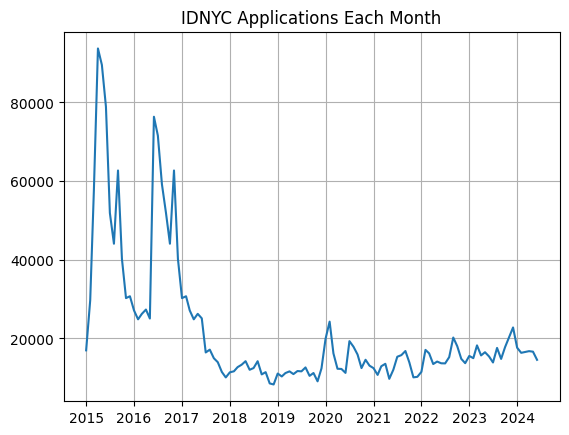

In [ ]:
plt.plot(df.index.values.astype('datetime64[M]') , df['apps'])
plt.grid(True)
plt.title('IDNYC Applications Each Month')
plt.show()

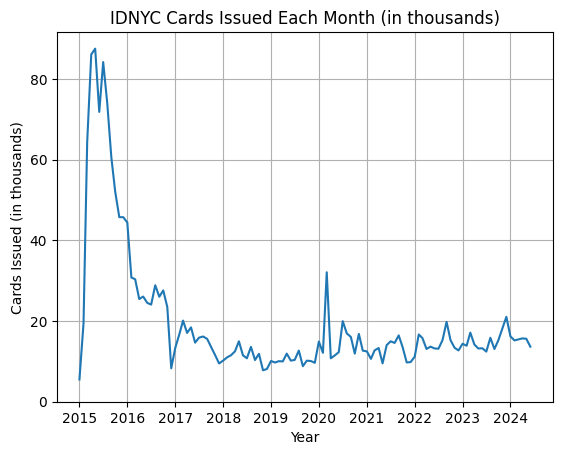

In [ ]:
plt.plot(df.index.values.astype('datetime64[M]') , df['cards_issued']/10**3)
# plt.scatter(df.index.values.astype('datetime64[M]') , df['cards_issued'])
plt.grid(True)

plt.ylabel('Cards Issued (in thousands)')
plt.xlabel('Year')

plt.title('IDNYC Cards Issued Each Month (in thousands)')

plt.ylim(bottom=0)
plt.show()

In [ ]:
df['cards_issued'].sum()

2210823

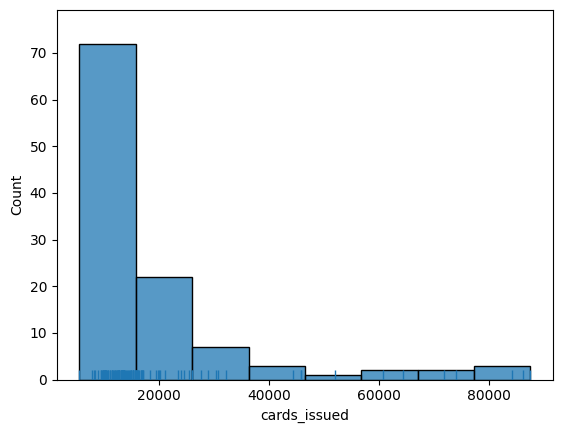

In [ ]:
sns.histplot(df['cards_issued'],binwidth = 10000)

sns.rugplot(df['cards_issued'])
# sns.boxplot(df['cards_issued'])
plt.show()

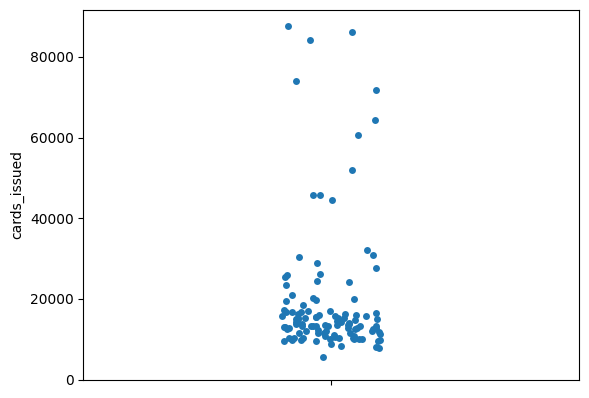

In [ ]:
sns.stripplot(df['cards_issued'])
# sns.boxplot(df['cards_issued'])
plt.ylim(bottom=0)
plt.show()

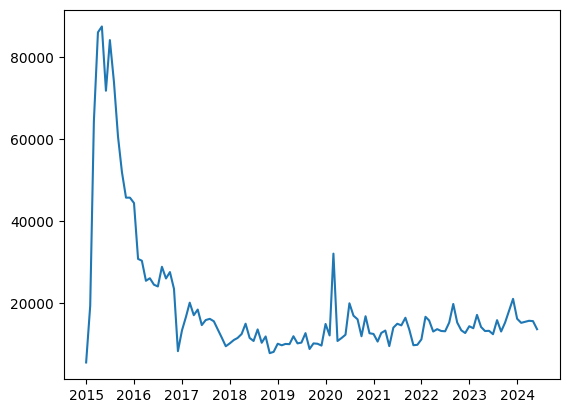

In [ ]:
plt.plot(df.index.values.astype('datetime64[M]') , df['cards_issued'])

In [ ]:
mask = df.index.year >= 2018
df[mask].head()

,apps,cards_issued
Month,,
2018-01-01,11362,10202
2018-02-01,11619,11020
2018-03-01,12677,11506
2018-04-01,13298,12473
2018-05-01,14198,14987


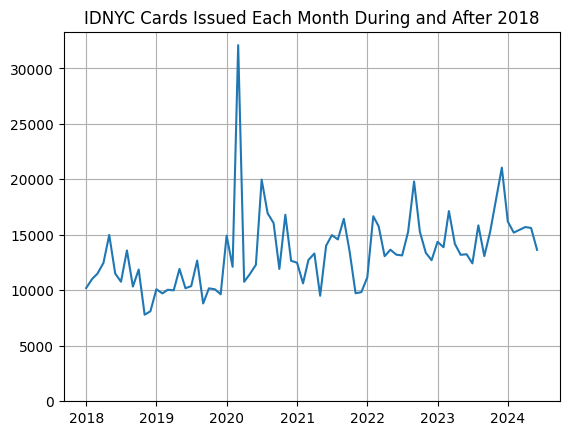

In [ ]:
plt.plot(df[mask].index.values.astype('datetime64[M]') , df[mask]['cards_issued'])

plt.grid(True)


plt.title('IDNYC Cards Issued Each Month During and After 2018')
plt.ylim(bottom=0)
plt.show()

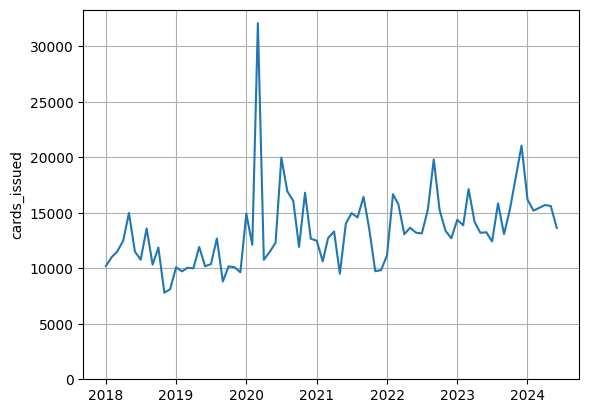

In [ ]:
sns.lineplot(x = df[mask].index.values.astype('datetime64[M]') , y = df[mask]['cards_issued'])

plt.grid(True)
plt.ylim(bottom=0)
plt.show()

In [ ]:
df[mask].sort_values(by = 'cards_issued',ascending = False).head()

,apps,cards_issued
Month,,
2020-03-01,16178,32092
2023-12-01,22775,21054
2020-07-01,19294,19974
2022-09-01,20211,19808
2023-03-01,18214,17138


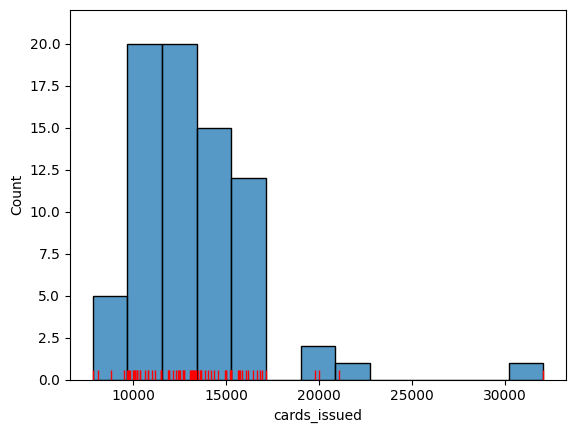

In [ ]:
sns.histplot(df[mask]['cards_issued'])
sns.rugplot(df[mask]['cards_issued'],color = 'r')
plt.show()

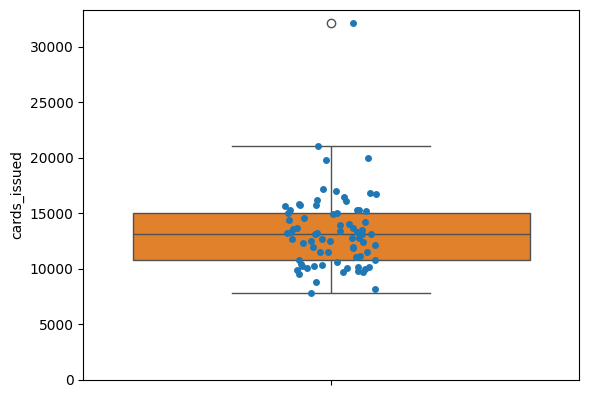

In [ ]:
sns.stripplot(df[mask]['cards_issued'])
sns.boxplot(df[mask]['cards_issued'])
plt.ylim(bottom=0)
plt.show()

<Axes: ylabel='cards_issued'>

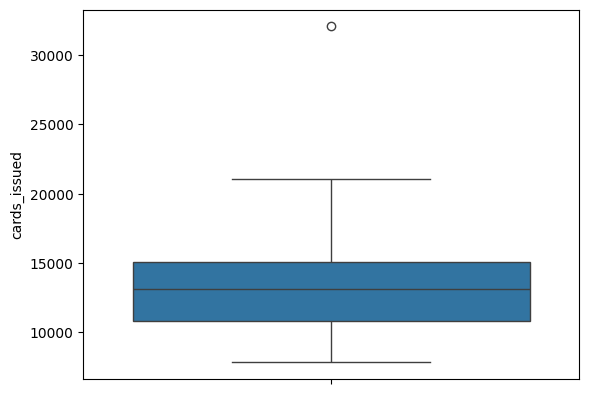

In [ ]:
sns.boxplot(df[mask]['cards_issued'])

In [ ]:
df[mask].rolling(12,center = True).mean().head(20)

,apps,cards_issued
Month,,
2018-01-01,NaN,NaN
2018-02-01,NaN,NaN
2018-03-01,NaN,NaN
2018-04-01,NaN,NaN
2018-05-01,NaN,NaN
2018-06-01,NaN,NaN
2018-07-01,11737.000000,11182.333333
2018-08-01,11711.416667,11173.500000
2018-09-01,11602.333333,11065.333333


In [ ]:
  len(df.index.year.unique())

10

In [ ]:
def compare_years(df):



  for i,t in enumerate(df.index.year.unique(),start = 1):

    mask = df.index.year == t
    plt.plot(df[mask]['cards_issued'].index.month, df[mask]['cards_issued'],label = t)
    plt.scatter(df[mask]['cards_issued'].index.month, df[mask]['cards_issued'])




  plt.legend(bbox_to_anchor=(-0.15, 1))
  plt.grid(True)
  plt.ylim(bottom=0)
  plt.show()

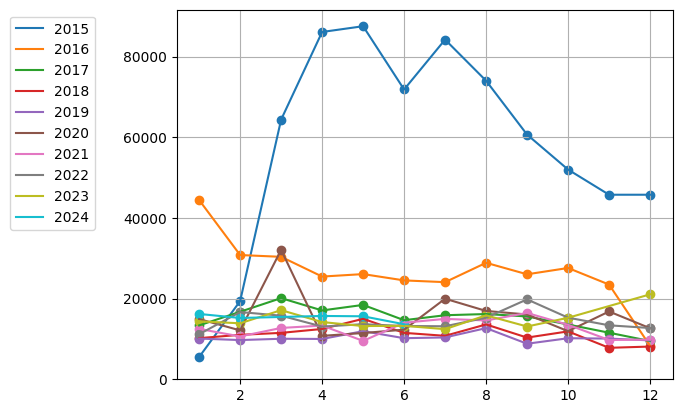

In [ ]:
compare_years(df)

In [ ]:
dr = pd.date_range(start = df.index.min(),end = df.index.max(),freq = 'MS',)

In [ ]:
dr.difference(df.index)

DatetimeIndex(['2023-11-01', '2024-03-01'], dtype='datetime64[ns]', freq=None)

We are missing two months of data. We will use the midpoint netween the previous and next month to estimate cards issued for each missing month.

In [ ]:
A = dr.difference(df.index)

In [ ]:
pd.timedelta_range

In [ ]:
A[0]

Timestamp('2023-11-01 00:00:00')

In [ ]:
df.index.day.unique()

Index([1], dtype='int32', name='Month')

In [ ]:
for t in df.index.year.unique():
  print(df[df.index.year == t]['cards_issued'].nunique())

12
12
12
12
12
12
12
12
11
5


In [ ]:
l = df.loc[A[0] + pd.offsets.MonthBegin(-1),:]['cards_issued']
r = df.loc[A[0] + pd.offsets.MonthBegin(1),:]['cards_issued']
print( (l + r)/2)

18153.5


In [ ]:
df.loc[]

In [ ]:
A[0] + pd.offsets.MonthBegin(1)

In [ ]:
A[0] - pd.offsets.MonthBegin(1)

In [ ]:
def inspect_window(A,df):

  l = A[0] - pd.offsets.MonthBegin(6)
  r = A[0] + pd.offsets.MonthBegin(6)

  mask = pd.date_range(start = l, end = r , freq = 'MS')

  mask = mask.intersection( df.index)

  return df.loc[mask , :]




In [ ]:
l = A[0] - pd.offsets.MonthBegin(6)
r = A[0] + pd.offsets.MonthBegin(6)

pd.date_range(start = l, end = r , freq = 'MS')

DatetimeIndex(['2023-05-01', '2023-06-01', '2023-07-01', '2023-08-01',
               '2023-09-01', '2023-10-01', '2023-11-01', '2023-12-01',
               '2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01'],
              dtype='datetime64[ns]', freq='MS')

In [ ]:
20/15 - 1

0.33333333333333326

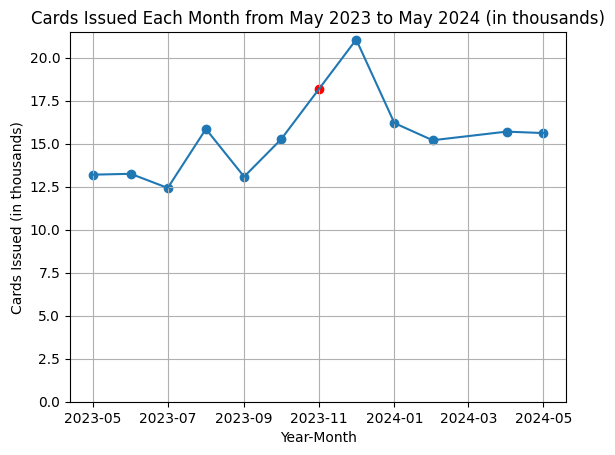

In [ ]:
plt.scatter(A[0] , (l + r)/2 /10**3, color = 'r')

plt.plot(inspect_window(A,df)['cards_issued'].index,inspect_window(A,df)['cards_issued']/10**3)
plt.scatter(inspect_window(A,df)['cards_issued'].index,inspect_window(A,df)['cards_issued']/10**3)


plt.title('Cards Issued Each Month from May 2023 to May 2024 (in thousands)')
plt.xlabel('Year-Month')

plt.ylabel('Cards Issued (in thousands)')


plt.grid(True)
plt.ylim(bottom=0)
plt.show()

In [ ]:
l

15253

In [ ]:
r = df.loc[A[0] + pd.offsets.MonthBegin(1),:]['cards_issued']

21054

In [ ]:
df.index.difference(dr)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [ ]:
df[df.index.year == 2024]

,apps,cards_issued
Month,,
2024-01-01,17628,16198
2024-02-01,16323,15200
2024-04-01,16747,15701
2024-05-01,16613,15617
2024-06-01,14539,13646


In [ ]:
def compare_past_n_years(df,n):



  for i,t in enumerate(df.index.year.unique()[-n:],start = 1):

    mask = df.index.year == t
    plt.plot(df[mask]['cards_issued'].index.month, df[mask]['cards_issued'],label = t)
    plt.scatter(df[mask]['cards_issued'].index.month, df[mask]['cards_issued'])




  plt.legend(bbox_to_anchor=(-0.15, 1))
  plt.grid(True)
  plt.ylim(bottom=0)
  plt.show()

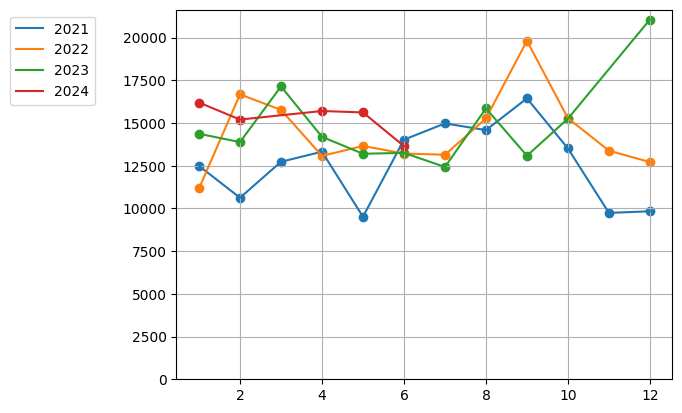

In [ ]:
compare_past_n_years(df,4)

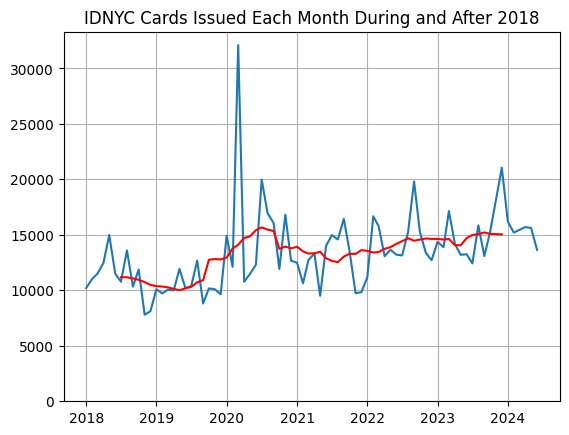

In [ ]:
plt.plot(df[mask].index.values.astype('datetime64[M]') , df[mask]['cards_issued'])

plt.plot(df[mask].rolling(12,center = True).mean()['cards_issued'],color = 'r')


plt.grid(True)

plt.grid(True)
plt.title('IDNYC Cards Issued Each Month During and After 2018')
plt.ylim(bottom=0)
plt.show()



In [ ]:
df.resample('y').sum()

,apps,cards_issued
Month,,
2015-12-31,626309,697210
2016-12-31,536599,320026
2017-12-31,248180,182624
2018-12-31,140844,134188
2019-12-31,134043,123763
2020-12-31,189156,188050
2021-12-31,153299,151769
2022-12-31,181537,173141
2023-12-31,182978,163690


In [ ]:
df.resample('y').sum().tail()


,apps,cards_issued
Month,,
2020-12-31,189156,188050
2021-12-31,153299,151769
2022-12-31,181537,173141
2023-12-31,182978,163690
2024-12-31,81850,76362


In [ ]:
df.resample('y').sum().index.year

Index([2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024], dtype='int32', name='Month')

In [ ]:
160000+18000

178000

In [ ]:
163690 + 18153

181843

In [ ]:
# 2023 sum 163690  midpoint 18153

9.016993968105323

In [ ]:
df.resample('y').sum()['cards_issued']

,cards_issued
Month,
2015-12-31,697210
2016-12-31,320026
2017-12-31,182624
2018-12-31,134188
2019-12-31,123763
2020-12-31,188050
2021-12-31,151769
2022-12-31,173141
2023-12-31,163690


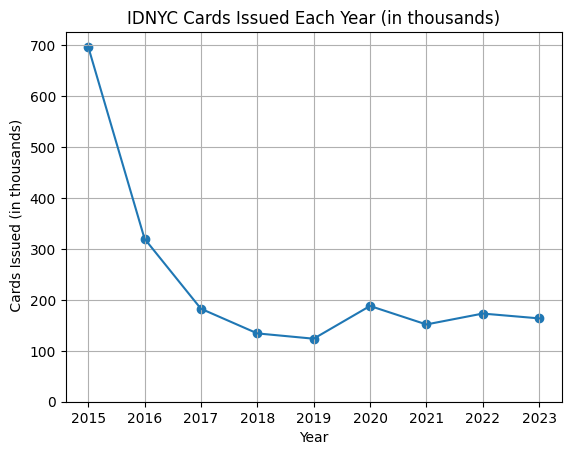

In [ ]:
def plot_cards_issued_each_year(df):
  mask = df.index.year < 2024
  df = df[mask]
  s = df.resample('y').sum()['cards_issued']/(10**3)

  plt.plot(s.index.year,s  )
  plt.scatter(s.index.year,s )

  plt.xlabel('Year',)


  plt.ylabel(' Cards Issued (in thousands)')

  plt.grid(True)
  plt.title('IDNYC Cards Issued Each Year (in thousands)')
  plt.ylim(bottom=0)
  plt.show()

plot_cards_issued_each_year(df)

In [ ]:
def cards_issued_to_year(df,year):
  mask = df.index.year < year
  df = df[mask]
  x = df["cards_issued"].sum()
  print(f'cards issued before {year}: {x}\n')
  print(f'Rounded: {round(x,-int(np.floor(np.log10(x))))}\n')

  print(f'Order of magnitude: {np.floor(np.log10(x))}')




In [ ]:
cards_issued_to_year(df,2025)

cards issued before 2025: 2210823

Rounded: 2000000

Order of magnitude: 6.0


We see that there have been at least 2 million IDNYC cards issued from 2015 to 2024, with cards issued in 2024 not included, since the year is not over yet.

In [ ]:
df.head()

,apps,cards_issued
Month,,
2015-01-01,16952,5523
2015-02-01,29684,19383
2015-03-01,57608,64379
2015-04-01,93739,86112
2015-05-01,89564,87540


<Axes: ylabel='cards_issued'>

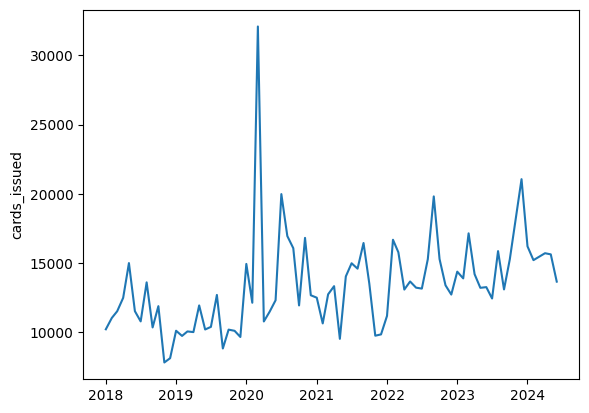

In [ ]:
sns.lineplot(x = df[mask].index.values.astype('datetime64[M]') , y = df[mask]['cards_issued'])